<a href="https://colab.research.google.com/github/Raajarapu/SAP_COLLEGE_EDUNET_FOUDATION/blob/main/Model2logisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_auc_score, roc_curve)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
df=pd.read_csv('gas_supply_synthetic.csv')

In [ ]:
df

,record_id,date,region,city,station_id,temp_c,humidity_pct,population_density_per_km2,distance_to_refinery_km,truck_capacity_m3,num_trucks,day_of_week,holiday_flag,gas_price_per_unit,maintenance_flag,pipeline_disruption_flag,demand_volume_m3,supply_capacity_m3,delivery_time_hrs,stockout
0,1,2023-04-13,East,CityH,S1124,11.45,43.70,168.66,11.91,1500,4,3,0,69.00,1,0,706,5487,4.00,0
1,2,2023-12-15,East,CityI,S1256,25.75,44.28,352.74,195.68,1500,2,4,0,65.82,0,0,893,2447,10.12,0
2,3,2023-09-28,West,CityK,S1091,20.06,41.38,256.57,142.20,1500,3,3,0,62.42,0,0,957,3632,7.37,0
3,4,2023-04-17,East,CityI,S1224,23.97,42.08,674.56,128.91,2000,8,0,1,53.15,0,0,1224,13953,6.71,1
4,5,2023-03-13,North,CityA,S1194,17.03,53.11,117.94,93.00,1000,6,0,0,56.36,0,0,622,4877,5.59,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14996,2023-10-23,South,CityD,S1090,15.17,45.39,260.91,152.42,2000,5,0,0,46.44,0,0,886,9871,7.53,0
14996,14997,2023-05-14,Central,CityM,S1035,22.89,75.75,69.37,152.10,1500,8,6,0,65.07,0,0,657,10889,6.96,0
14997,14998,2023-01-27,East,CityI,S1006,25.43,68.46,117.71,81.86,1500,9,4,0,61.52,0,0,823,13279,9.41,0
14998,14999,2023-02-07,South,CityE,S1320,20.48,88.34,318.11,29.14,1500,13,1,0,71.71,0,0,859,15802,4.69,1


In [ ]:
df.head()

,record_id,date,region,city,station_id,temp_c,humidity_pct,population_density_per_km2,distance_to_refinery_km,truck_capacity_m3,num_trucks,day_of_week,holiday_flag,gas_price_per_unit,maintenance_flag,pipeline_disruption_flag,demand_volume_m3,supply_capacity_m3,delivery_time_hrs,stockout
0,1,2023-04-13,East,CityH,S1124,11.45,43.70,168.66,11.91,1500,4,3,0,69.00,1,0,706,5487,4.00,0
1,2,2023-12-15,East,CityI,S1256,25.75,44.28,352.74,195.68,1500,2,4,0,65.82,0,0,893,2447,10.12,0
2,3,2023-09-28,West,CityK,S1091,20.06,41.38,256.57,142.20,1500,3,3,0,62.42,0,0,957,3632,7.37,0
3,4,2023-04-17,East,CityI,S1224,23.97,42.08,674.56,128.91,2000,8,0,1,53.15,0,0,1224,13953,6.71,1
4,5,2023-03-13,North,CityA,S1194,17.03,53.11,117.94,93.00,1000,6,0,0,56.36,0,0,622,4877,5.59,0


In [ ]:
df.head(1000)

,record_id,date,region,city,station_id,temp_c,humidity_pct,population_density_per_km2,distance_to_refinery_km,truck_capacity_m3,num_trucks,day_of_week,holiday_flag,gas_price_per_unit,maintenance_flag,pipeline_disruption_flag,demand_volume_m3,supply_capacity_m3,delivery_time_hrs,stockout
0,1,2023-04-13,East,CityH,S1124,11.45,43.70,168.66,11.91,1500,4,3,0,69.00,1,0,706,5487,4.00,0
1,2,2023-12-15,East,CityI,S1256,25.75,44.28,352.74,195.68,1500,2,4,0,65.82,0,0,893,2447,10.12,0
2,3,2023-09-28,West,CityK,S1091,20.06,41.38,256.57,142.20,1500,3,3,0,62.42,0,0,957,3632,7.37,0
3,4,2023-04-17,East,CityI,S1224,23.97,42.08,674.56,128.91,2000,8,0,1,53.15,0,0,1224,13953,6.71,1
4,5,2023-03-13,North,CityA,S1194,17.03,53.11,117.94,93.00,1000,6,0,0,56.36,0,0,622,4877,5.59,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,2023-02-07,West,CityK,S1127,36.89,54.02,42.00,101.15,1500,9,1,0,49.65,0,0,685,10120,7.12,0
996,997,2023-10-20,Central,CityN,S1485,34.06,50.49,78.30,49.94,1000,4,4,0,58.71,0,0,613,3349,7.59,0
997,998,2023-05-19,West,CityL,S1075,22.94,48.36,318.77,30.01,1000,2,4,0,49.26,0,0,918,1452,2.15,1
998,999,2023-12-22,North,CityC,S1374,26.48,48.99,161.24,141.25,2500,6,4,0,48.12,0,0,855,11105,8.17,0


In [ ]:
df.isnull().sum()

record_id                     0
date                          0
region                        0
city                          0
station_id                    0
temp_c                        0
humidity_pct                  0
population_density_per_km2    0
distance_to_refinery_km       0
truck_capacity_m3             0
num_trucks                    0
day_of_week                   0
holiday_flag                  0
gas_price_per_unit            0
maintenance_flag              0
pipeline_disruption_flag      0
demand_volume_m3              0
supply_capacity_m3            0
delivery_time_hrs             0
stockout                      0
dtype: int64

In [ ]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
14995    False
14996    False
14997    False
14998    False
14999    False
Length: 15000, dtype: bool

In [ ]:
df.sample(500)

,record_id,date,region,city,station_id,temp_c,humidity_pct,population_density_per_km2,distance_to_refinery_km,truck_capacity_m3,num_trucks,day_of_week,holiday_flag,gas_price_per_unit,maintenance_flag,pipeline_disruption_flag,demand_volume_m3,supply_capacity_m3,delivery_time_hrs,stockout
11179,11180,2023-08-23,Central,CityO,S1084,32.61,47.33,17.31,115.36,2500,6,2,0,56.18,0,0,786,13059,6.18,1
536,537,2023-08-05,West,CityK,S1186,35.96,81.08,93.67,157.52,1500,4,5,0,66.33,0,0,719,4226,7.61,1
9199,9200,2023-04-26,East,CityH,S1006,22.96,83.13,40.71,219.99,2000,2,2,0,65.36,0,0,754,3473,8.90,0
6605,6606,2023-02-03,East,CityI,S1274,21.52,64.69,475.72,169.46,1000,5,4,0,58.64,0,0,892,4379,12.31,0
8726,8727,2023-05-26,West,CityL,S1283,16.10,96.05,235.38,169.25,1000,7,4,1,56.92,0,0,772,5955,6.27,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
906,907,2023-01-28,East,CityG,S1232,31.20,97.13,1240.59,163.24,2000,14,5,0,69.99,0,0,1601,26178,10.63,1
3977,3978,2023-01-08,West,CityL,S1163,14.33,53.82,225.78,80.58,2000,7,6,0,62.18,0,0,871,13217,7.37,0
11057,11058,2023-01-29,Central,CityN,S1250,28.48,85.71,241.81,193.18,2000,9,6,0,46.94,0,0,852,15824,12.77,0
4752,4753,2023-05-18,East,CityH,S1207,15.30,47.01,383.26,88.68,1000,6,3,0,63.81,0,0,982,5484,7.96,0


In [ ]:
y = df['stockout']
X = df[[
    'temp_c','humidity_pct','population_density_per_km2','distance_to_refinery_km',
    'truck_capacity_m3','num_trucks','day_of_week','holiday_flag','gas_price_per_unit',
    'maintenance_flag','pipeline_disruption_flag','demand_volume_m3','supply_capacity_m3','delivery_time_hrs'
]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,           # 20% test data
    random_state=42,
    stratify=y               # keep same class ratio
)

In [ ]:
scaler=StandardScaler()

In [ ]:
X_train=scaler.fit_transform(X_train)

In [ ]:
X_test=scaler.transform(X_test)

In [ ]:
model =  LogisticRegression()

model.fit(X_train, y_train)



LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 69.57%


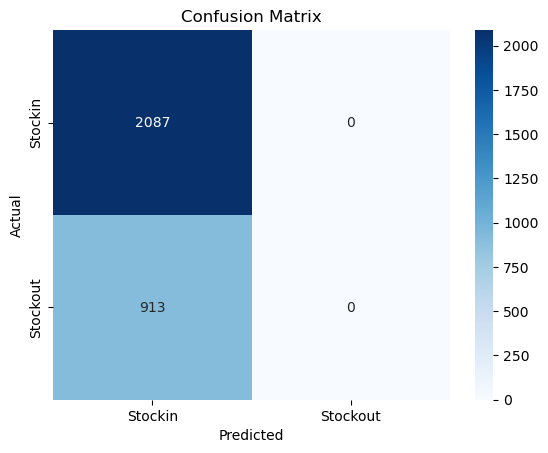

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Stockin', 'Stockout'], yticklabels=['Stockin', 'Stockout'] )

plt.xlabel('Predicted')

plt.ylabel('Actual')

plt.title('Confusion Matrix')

plt.show()

In [ ]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[2087    0]
 [ 913    0]]


In [ ]:
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=1))



Classification Report:
               precision    recall  f1-score   support

           0       0.70      1.00      0.82      2087
           1       1.00      0.00      0.00       913

    accuracy                           0.70      3000
   macro avg       0.85      0.50      0.41      3000
weighted avg       0.79      0.70      0.57      3000



In [ ]:
importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

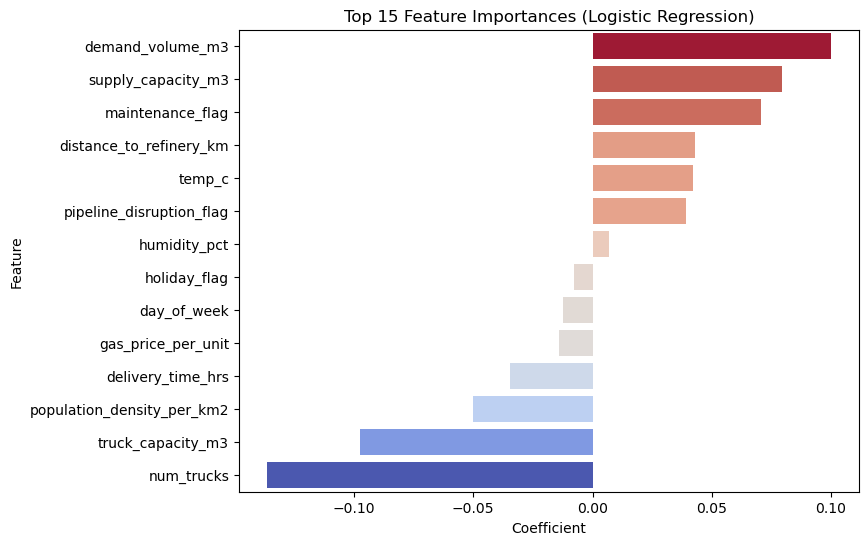

In [ ]:
#GRAPH 1: Top 12 Feature Importances
plt.figure(figsize=(8,6))
sns.barplot(
    data=importance.head(15),
    x='Coefficient',
    y='Feature',
    hue='Coefficient',
    palette='coolwarm',
    legend=False
)
plt.title("Top 15 Feature Importances (Logistic Regression)")
plt.show()

In [ ]:
sns.set(style="whitegrid", palette="Set2")
plt.rcParams["figure.figsize"] = (10, 6)

In [ ]:
if 'supply_capacity_m3' in df.columns:
    total_supply = df['supply_capacity_m3'].sum()
    print(f"Total Supply Capacity: {total_supply:,.2f} m³")

Total Supply Capacity: 124,118,352.00 m³


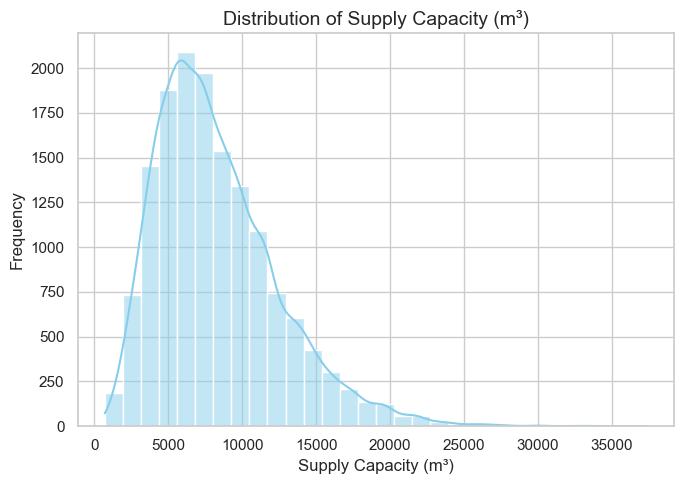

In [ ]:
#GRAPH 2: Total Supply Capacity (m³)
plt.figure(figsize=(7,5))
sns.histplot(df['supply_capacity_m3'], bins=30, kde=True, color="skyblue")
plt.title("Distribution of Supply Capacity (m³)", fontsize=14)
plt.xlabel("Supply Capacity (m³)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

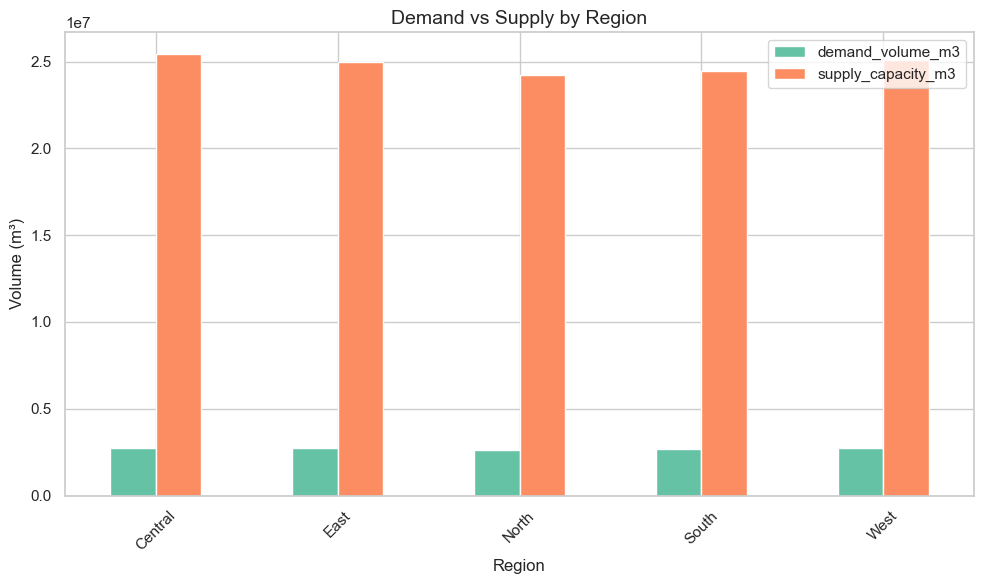

In [ ]:
#GRAPH 3: Demand vs Supply by Region
if {'region', 'demand_volume_m3', 'supply_capacity_m3'}.issubset(df.columns):
    region_demand_supply = df.groupby('region')[['demand_volume_m3','supply_capacity_m3']].sum().reset_index()
    plt.figure(figsize=(10,6))
    region_demand_supply.set_index('region')[['demand_volume_m3','supply_capacity_m3']].plot(kind='bar')
    plt.title("Demand vs Supply by Region", fontsize=14)
    plt.xlabel("Region")
    plt.ylabel("Volume (m³)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

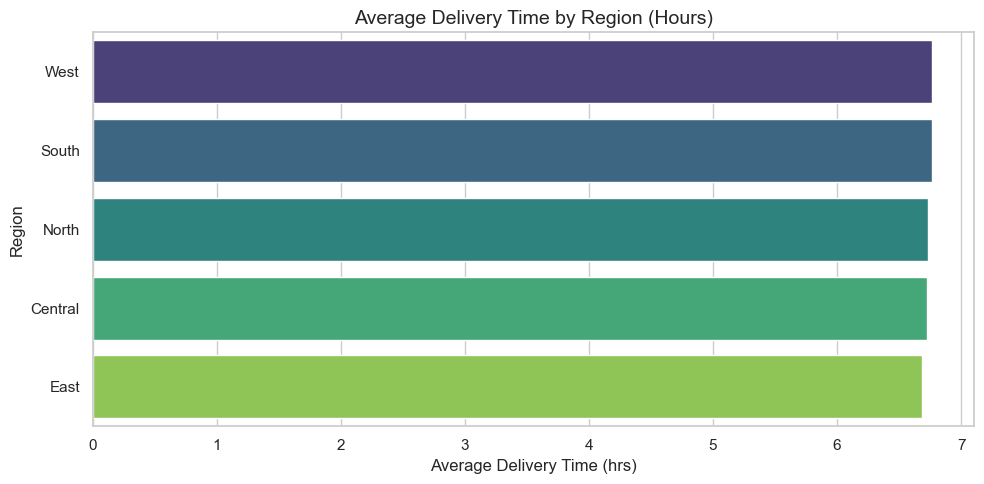

In [ ]:
#GRAPH 4: Average Delivery Time by Region
if {'region', 'delivery_time_hrs'}.issubset(df.columns):
    avg_delivery = df.groupby('region')['delivery_time_hrs'].mean().sort_values(ascending=False).reset_index()
    plt.figure(figsize=(10,5))
    sns.barplot(
    data=avg_delivery,
    x='delivery_time_hrs',
    y='region',
    hue='region',       # use same variable for coloring
    palette='viridis',
    legend=False        # hides redundant legend
)
plt.title("Average Delivery Time by Region (Hours)", fontsize=14)
plt.xlabel("Average Delivery Time (hrs)")
plt.ylabel("Region")
plt.tight_layout()
plt.show()

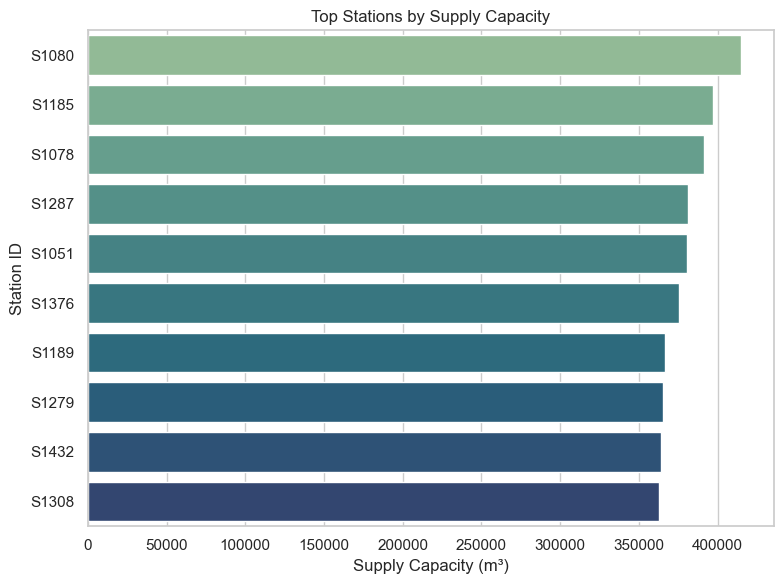

In [ ]:
#GRAPH 5: Top 10 Stations by Total Supply
plt.figure(figsize=(8,6))
sns.barplot(
    data=top_stations,
    x='supply_capacity_m3',
    y='station_id',
    hue='station_id',
    palette='crest',
    legend=False
)
plt.title("Top Stations by Supply Capacity")
plt.xlabel("Supply Capacity (m³)")
plt.ylabel("Station ID")
plt.tight_layout()
plt.show()